---
# Facebook AB Testing
---

##### Objective:

To evaluate and compare the effectiveness of Facebook's new "average bidding" system (test group) against the existing "maximum bidding" system (control group) over a 40-day period. The goal is to determine which bidding strategy yields higher impressions, clicks, purchases, and earnings, thereby identifying the most advantageous approach for maximizing our brand's advertising performance on Facebook.

##### Features:
- Impression: Number of impressions per ad.
- Click: Numbers of clicks per ad.
- Purchase: The number of products purchased after the click.
- Earnings: Earning after purchase.

##### Data Details:

Facebook recently introduced a new bidding system called "average bidding" (test group) alongside the existing "maximum bidding" (control group) system. These bidding systems determine which ads get displayed to users based on how much advertisers are willing to pay.

With "maximum bidding," advertisers specify the maximum amount they are willing to pay for each impression. For example, an advertiser might say, "I'm willing to pay a maximum of $10 for each impression."

With "average bidding," advertisers specify an average amount they are willing to pay for impressions. For instance, they might say, "On average, I'm willing to pay $6 for each impression."

## Import libraries

In [1]:
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

## Load Data

In [10]:
control_data = pd.read_csv('FBcontrol_group.csv')
test_data = pd.read_csv('FBtest_group.csv')

## Check the data

In [11]:
print(control_data.head())

   Impression  Click  Purchase  Earning
0       82529   6090       665     2311
1       98050   3383       315     1743
2       82696   4168       458     1798
3      109914   4911       487     1696
4      108458   5988       441     1544


In [12]:
print(test_data.head())

   Impression  Click  Purchase  Earning
0      120104   3217       702     1940
1      134776   3635       834     2929
2      107807   3057       423     2526
3      116445   4650       429     2281
4      145083   5201       750     2782


## Add columns

I added a column to separate control and test values. This will be helpful to differentiate both campaign when I merge the data sets.

In [ ]:
control_data.insert(loc=0, column="Campaign Name", value="Control Campaign")

In [25]:
control_data.head()

,Campaign Name,Impression,Click,Purchase,Earning
0,Control Campaign,82529,6090,665,2311
1,Control Campaign,98050,3383,315,1743
2,Control Campaign,82696,4168,458,1798
3,Control Campaign,109914,4911,487,1696
4,Control Campaign,108458,5988,441,1544


In [26]:
test_data.insert(loc=0, column="Campaign Name", value="Test Campaign")
control_data.head()

,Campaign Name,Impression,Click,Purchase,Earning
0,Control Campaign,82529,6090,665,2311
1,Control Campaign,98050,3383,315,1743
2,Control Campaign,82696,4168,458,1798
3,Control Campaign,109914,4911,487,1696
4,Control Campaign,108458,5988,441,1544


## Values check

Check if there are null values in the data sets

In [27]:
print(control_data.isnull().sum())

Campaign Name    0
Impression       0
Click            0
Purchase         0
Earning          0
dtype: int64


In [28]:
print(test_data.isnull().sum())

Campaign Name    0
Impression       0
Click            0
Purchase         0
Earning          0
dtype: int64


In [29]:
round(control_data.describe(), 2)

,Impression,Click,Purchase,Earning
count,40.00,40.00,40.00,40.00
mean,101711.45,5100.62,550.90,1908.58
std,20302.12,1329.96,134.11,302.87
min,45476.00,2190.00,267.00,1254.00
25%,85726.75,4124.25,470.50,1685.75
50%,99790.50,5001.50,531.50,1975.00
75%,115212.50,5923.50,638.00,2120.00
max,147539.00,7959.00,802.00,2497.00


In [30]:
round(test_data.describe(), 2)

,Impression,Click,Purchase,Earning
count,40.00,40.00,40.00,40.00
mean,120512.42,3967.55,582.05,2514.93
std,18807.47,923.07,161.18,282.71
min,79034.00,1837.00,312.00,1940.00
25%,112692.25,3376.50,444.75,2280.25
50%,119291.50,3931.50,551.00,2544.50
75%,132050.75,4660.25,699.75,2761.75
max,158606.00,6020.00,890.00,3171.00


## Merging Datasets

In [31]:
# Create a new dataset by merging both datasets:

ab_data = control_data.merge(test_data, 
                             how="outer")
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head())

      Campaign Name  Impression  Click  Purchase  Earning
0  Control Campaign       82529   6090       665     2311
1  Control Campaign       98050   3383       315     1743
2  Control Campaign       82696   4168       458     1798
3  Control Campaign      109914   4911       487     1696
4  Control Campaign      108458   5988       441     1544


In [32]:
print(ab_data.tail())

    Campaign Name  Impression  Click  Purchase  Earning
75  Test Campaign       79235   6002       382     2278
76  Test Campaign      130702   3626       450     2531
77  Test Campaign      116482   4703       472     2598
78  Test Campaign       79034   4495       425     2596
79  Test Campaign      102257   4800       521     2968


## Campaign Name

Before moving forward, let’s have a look if the dataset has an equal number of samples about both campaigns:

In [33]:
print(ab_data["Campaign Name"].value_counts())

Campaign Name
Control Campaign    40
Test Campaign       40
Name: count, dtype: int64


The dataset has 40 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

## Test Statistics

There is no statistically significant difference in the number of purchases between the control and test campaigns. 

In [82]:
# Test statistic for Purchases
from scipy import stats 
x = ab_data.loc[ab_data['Campaign Name'] == "Control Campaign", 'Purchase']
y = ab_data.loc[ab_data['Campaign Name'] == "Test Campaign", 'Purchase']
t_stat, p_val = stats.ttest_ind(x, y)  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = -0.9396022967737262
p-value = 0.3503222763935574


There is no statistically significant difference in the number of clicks between the control and test campaigns. 

In [84]:
# Test statistic for Clicks
from scipy import stats 
a = ab_data.loc[ab_data['Campaign Name'] == "Control Campaign", 'Click']
b = ab_data.loc[ab_data['Campaign Name'] == "Test Campaign", 'Click']
t_stat, p_val = stats.ttest_ind(a, b)  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 4.426573093387519
p-value = 3.074501441158839e-05


There is no statistically significant difference in the number of impression between the control and test campaigns. 

In [88]:
# Test statistic for Impressions
a = ab_data.loc[ab_data['Campaign Name'] == "Control Campaign", 'Impression']
b = ab_data.loc[ab_data['Campaign Name'] == "Test Campaign", 'Impression']
t_stat, p_val = stats.ttest_ind(a, b)
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = -4.296602570348743
p-value = 4.954665932520585e-05


There is no statistically significant difference in the earnings between the control and test campaigns. 

In [86]:
# Test statistic for Earnings
a = ab_data.loc[ab_data['Campaign Name'] == "Control Campaign", 'Earning']
b = ab_data.loc[ab_data['Campaign Name'] == "Test Campaign", 'Earning']
t_stat, p_val = stats.ttest_ind(a, b)  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = -9.256092651165002
p-value = 3.440360154842526e-14


In [34]:
round(ab_data.describe(), 2)

,Impression,Click,Purchase,Earning
count,80.00,80.00,80.00,80.00
mean,111111.94,4534.09,566.48,2211.75
std,21623.80,1272.35,148.15,421.69
min,45476.00,1837.00,267.00,1254.00
25%,95064.25,3632.75,458.00,1946.00
50%,114037.00,4321.50,532.00,2205.50
75%,124138.75,5273.00,679.25,2541.25
max,158606.00,7959.00,890.00,3171.00


## Distribution

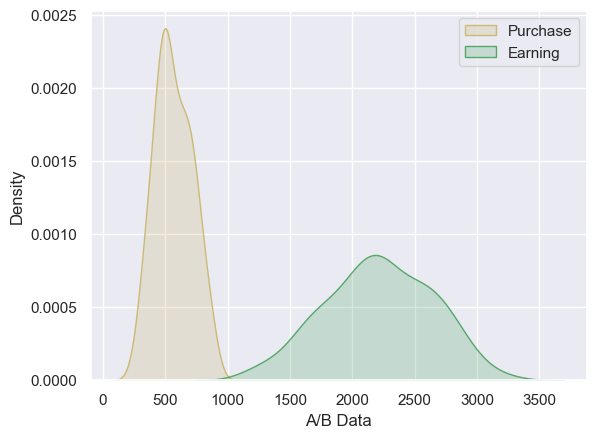

In [42]:
# set a grey background
sns.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sns.kdeplot(ab_data['Purchase'], fill=True, color="y")
fig = sns.kdeplot(ab_data['Earning'], fill=True, color="g")

plt.xlabel('A/B Data')
plt.legend(labels=['Purchase', 'Earning'])
plt.show()

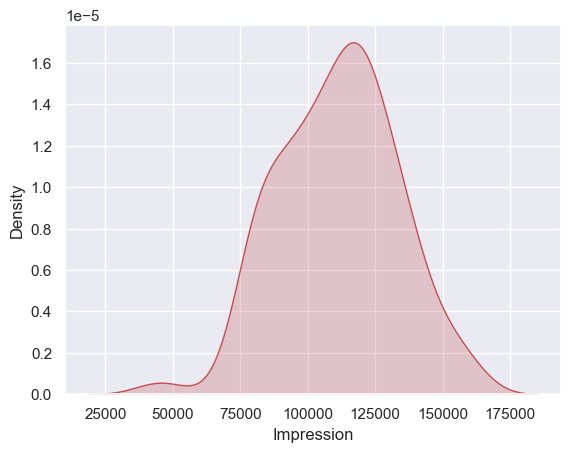

In [43]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sns.kdeplot(ab_data['Impression'], fill=True, color="r")

plt.xlabel('Impression')
plt.show()

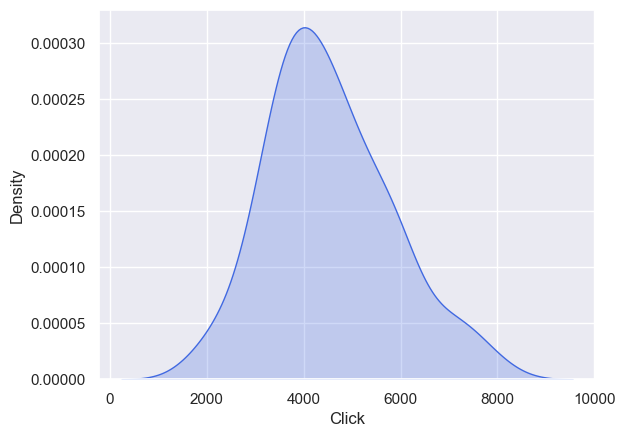

In [41]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sns.kdeplot(ab_data['Click'], fill=True, color="royalblue")

plt.xlabel('Click')
plt.show()

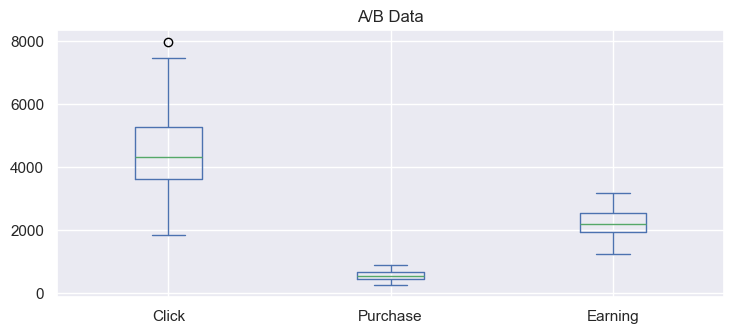

In [47]:
# Multiple box plots on one Axes
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
# Plot the dataframe
ax = ab_data[['Click', 'Purchase', 'Earning']].plot(kind='box', title='A/B Data')

plt.show()

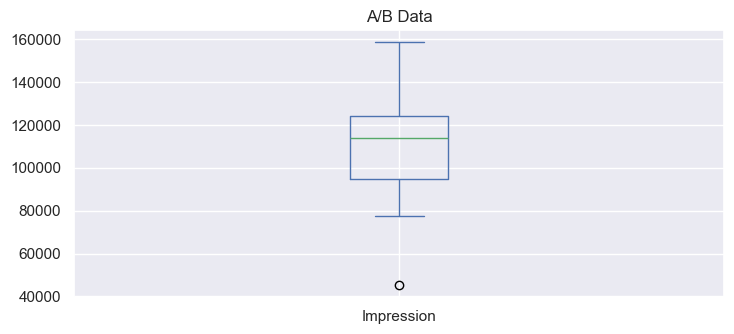

In [48]:
# Plot the dataframe
ax = ab_data['Impression'].plot(kind='box', title='A/B Data')

plt.show()

### Best Ad Bidding strategy
A/B Testing to Find the Best Ad Bidding Strategy:
Get started with A/B testing, I will first analyze the relationship between the number of impressions we got from both campaigns and the purchases on both campaigns:

#### Purchase vs Impressions

In [49]:
figure = px.scatter(data_frame = ab_data, 
                    x="Impression",
                    y="Purchase", 
                    size="Purchase", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

#### Earnings vs Impressions

In [59]:
figure = px.scatter(data_frame = ab_data, 
                    x="Impression",
                    y="Earning", 
                    size="Earning", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

#### Purchase vs Earnings

In [50]:
figure = px.scatter(data_frame = ab_data, 
                    x="Earning",
                    y="Purchase", 
                    size="Purchase", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

#### Purchase vs Number of Clicks

In [57]:
figure = px.scatter(data_frame = ab_data, 
                    x="Click",
                    y="Purchase", 
                    size="Purchase", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

#### Earnings vs Clicks

In [58]:
figure = px.scatter(data_frame = ab_data, 
                    x="Click",
                    y="Earning", 
                    size="Earning", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

## Total Impressions by Campaign

In [53]:
label = ["Impressions Made by Control Campaign", 
         "Impressions Made by Test Campaign"]
counts = [sum(control_data["Impression"]), 
          sum(test_data["Impression"])]
colors = ['mediumpurple', 'salmon']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Impressions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig.show()

## Total Clicks

In [55]:
label = ["Clicks Made by Control Campaign", 
         "Clicks Made by Test Campaign"]
counts = [sum(control_data["Click"]), 
          sum(test_data["Click"])]
colors = ['mediumpurple', 'salmon']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Clicks per Ad')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig.show()

## Total Purchases

Let's have a look to the purchases made by both campaigns

In [51]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchase"]), 
          sum(test_data["Purchase"])]
colors = ['mediumpurple', 'salmon']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig.show()

## Total Earnings

In [52]:
label = ["Control Campaign Earnings", 
         "Test Campaign Earnings"]
counts = [sum(control_data["Earning"]), 
          sum(test_data["Earning"])]
colors = ['mediumpurple', 'salmon']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Earnings')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig.show()

## Conclusion

Test statistics were performed on variables including Clicks, Purchases, Impressions, and Earnings. The analysis indicated no significant difference between the control and test campaigns in any of these variables. The maximum bidding strategy (control campaign) generated significantly more clicks per ad. However, the number of products purchased after clicks was slightly higher for the average bidding strategy (test campaign). Additionally, the average bidding strategy resulted in significantly higher earnings and impressions. Based on these results, the average bidding strategy demonstrated slightly higher overall success compared to the maximum bidding strategy, although the differences were not statistically significant.

## Recommendations

a. Based on the A/B testing results comparing two Facebook advertising systems, we should consider adopting the average bidding system, as it led to more impressions, purchases, and earnings. Although the maximum bidding strategy produced more clicks, it might not be the most effective for maximizing purchases.

b. Further modifications and A/B testing can be conducted on both maximum and average bidding campaigns, or new ad bidding strategies can be proposed.

c. Facebook could offer multiple ad bidding options, allowing customers to choose the option that best fits their needs and budget.

## References

Data source: https://www.kaggle.com/datasets/furth3r/facebook-ab-test-of-bidding-feature